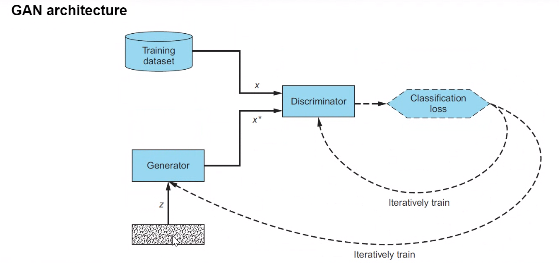
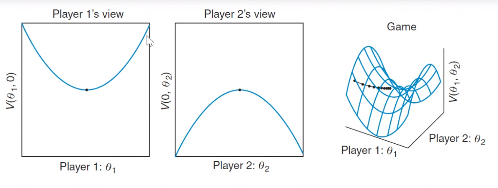
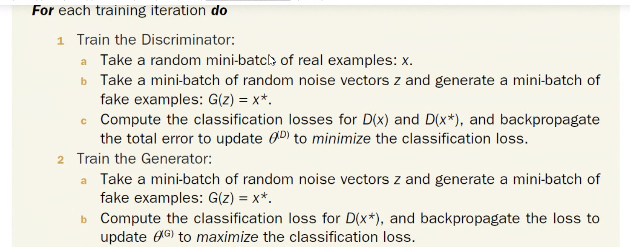


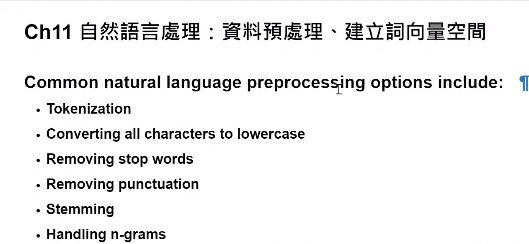
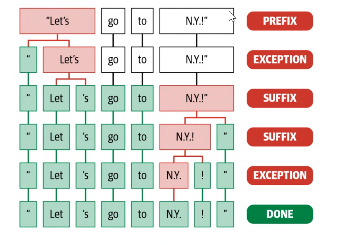
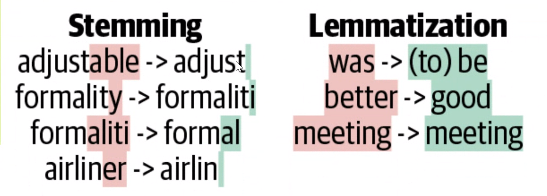
    
    stemming詞幹 lemmatization

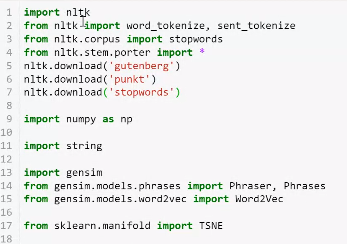
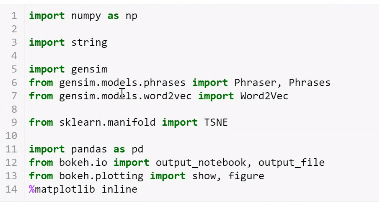

In [ ]:
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download("gutenberg") #外國印刷術發明計畫 古騰堡計畫
nltk.download("punkt")
nltk.download("stopwords")

In [ ]:
import numpy as np

import string

import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

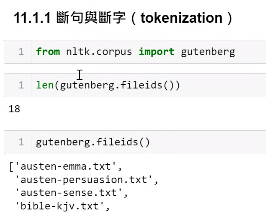
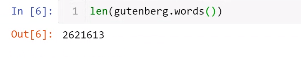

In [ ]:
from nltk.corpus import gutenberg
len(gutenberg.fileids)

In [ ]:
gutenberg.fileids()

In [ ]:
len(gutenberg.words())

    pip install nltk gensim bokeh
    import nltk nltk.download('gutenberg')

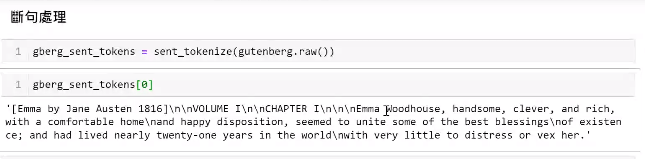
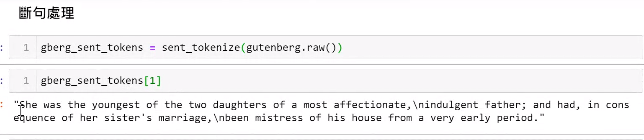

In [ ]:
gberg_sent_tokens=sent_tokenize(gutenberg.raw())

In [ ]:
gberg_sent_tokens[0]

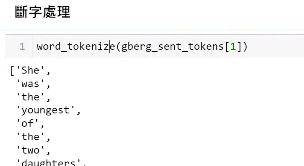
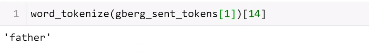

In [ ]:
word_tokenize(gberg_sent_tokens[1])

In [ ]:
word_tokenize(gberg_sent_tokens[1])[14]

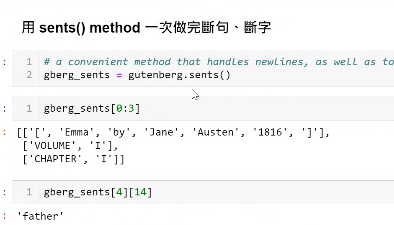

In [ ]:
gberg_sents=gutenberg.sents()

In [ ]:
gberg_sents[:3]

In [ ]:
gberg_sents[4][14]

#### 轉大寫
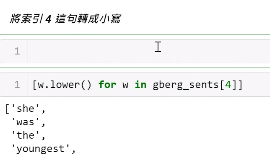

In [ ]:
[w.lower() for w in gberg_sents[4]]

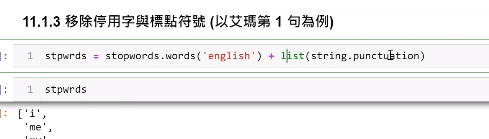

In [ ]:
stpwrds=stopwords.words('english')+list(string.punctuation)
stpwrds

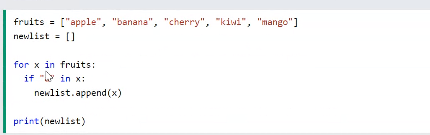
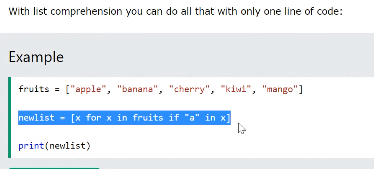
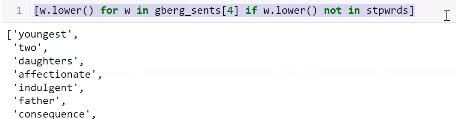

In [ ]:
[w.lower() for w in gberg_stents[4] if w.lower() not in stpwrds]

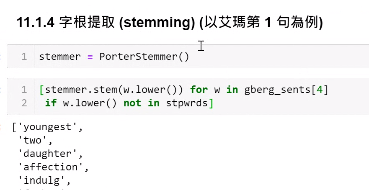

In [ ]:
stemmer=PorterStemmer()
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w.lower() not in stpwrds]

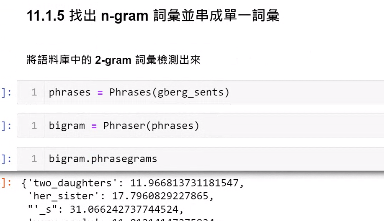

In [ ]:
phrases=Phrases(gberg_sents) #列出2個字一起出現的機率高的 #bi=binary=2
bigram=Phraser(phrases)  #2個字用底線連一起
bigram.phrasesgrams

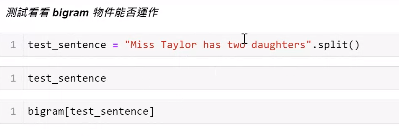

In [ ]:
test_sentence="Miss Taylor has two daughter".split()
test_sentence

In [ ]:
bigram[test_sentence]

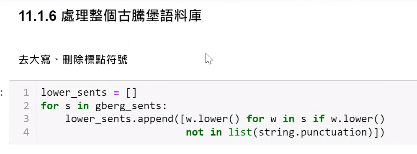

In [ ]:
lower_sents=[]
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower() 
                        not in list(string.punctuation)])

In [ ]:
len(lower_sents)

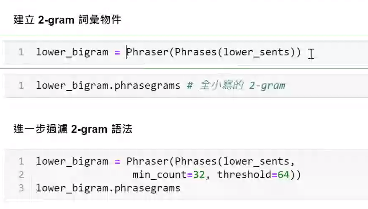

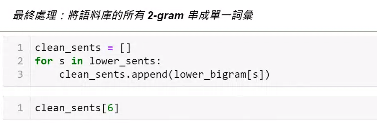

In [ ]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

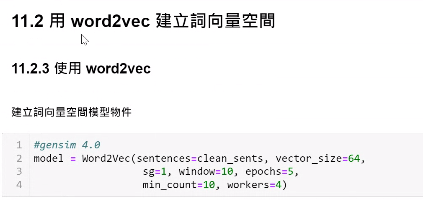
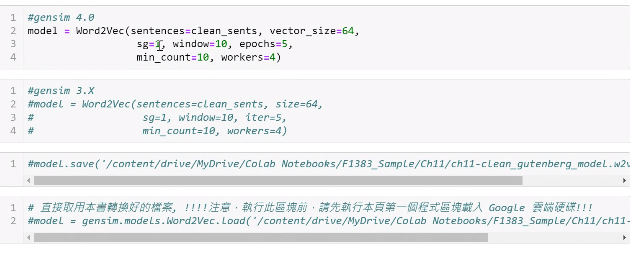

In [ ]:
model=Word2Vec(sentences=clean_sents,vector_size=64,sg=1,
               window=10,epochs=5,min_count=10,workers=4)
#64維.skip-gram.window=前後10個字.

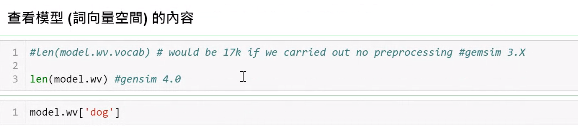

In [ ]:
len(model.wv)

In [ ]:
model.wv["dog"]

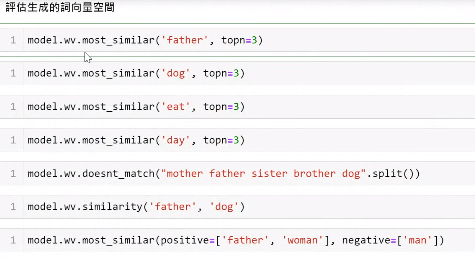
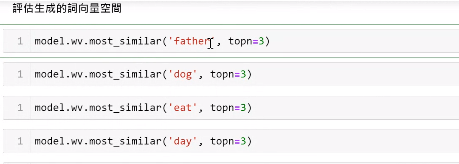
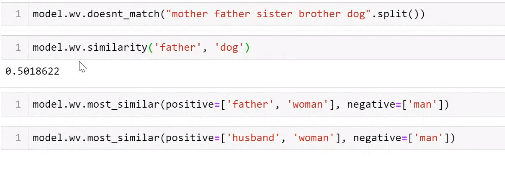
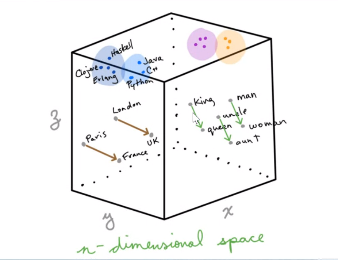

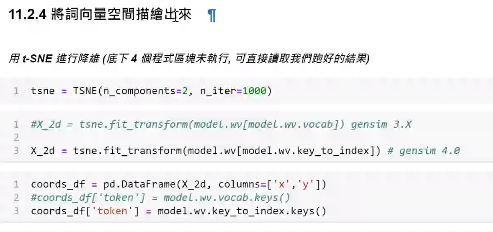

In [ ]:
tsne=TSNE(n_components=2,n_iter=1000)

In [ ]:
X_2d=tsne.fit_transform(model.wv[model.wv.key_to_index])

In [ ]:
coords_df=pd.DataFrame(X_2d,columns=['x','y'])
coords_df['token']=model.wv.key_to_index.keys()

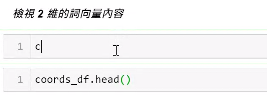

In [ ]:
coords_df.head()

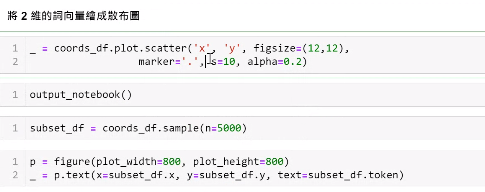
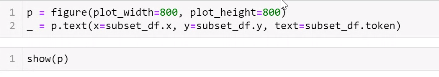

In [ ]:
_=coords_df.plot.scatter('x','y',figsize=(12,12),marker='.',s=10,alpha=0.2)

In [ ]:
output_notebook()

In [ ]:
subset_df=coords_df.sample(n=5000)

In [ ]:
p=figure(plot_width=800,plot_hight=800)
_=p.text(x=subset_df.x,y=subset_df.y,text=subset_df.token)

In [ ]:
show(p)

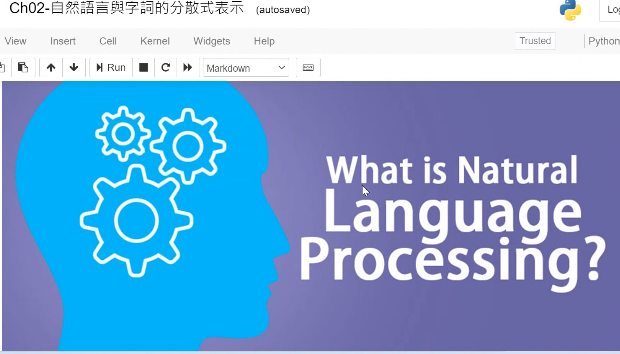
    
    影像處理 自然語言處理 大數據處理
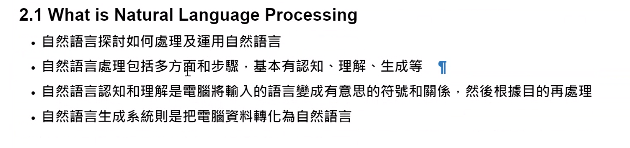
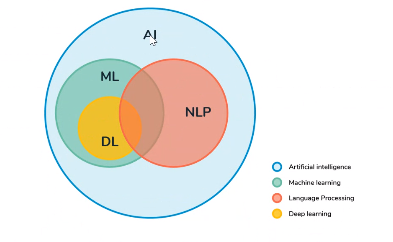
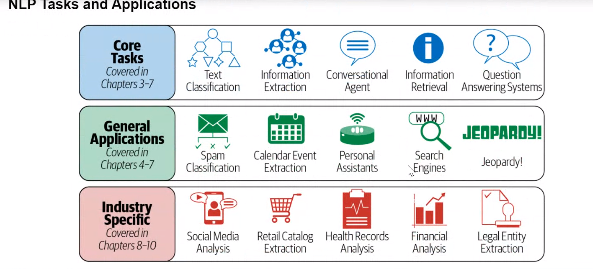